Creat per Josep Añó

# Programa para sacar información de temperatura comunidad valenciana a través de la web AVAMET por comarcas segun su densidad, Associació Valenciana de Meteorologia


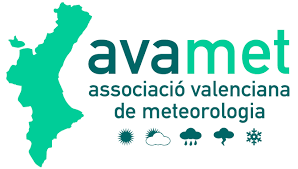

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import datetime
import sys
r = requests.get("https://es.wikipedia.org/wiki/Anexo:Comarcas_de_la_Comunidad_Valenciana")
soup = BeautifulSoup(r.text, "html.parser")
rows=list()
for row in soup.findAll("tr"):
   rows.append(row)
df = pd.read_html(str(rows),decimal=',', thousands='.')[0]
df.Densidad = df.Densidad.str.replace(",", ',')
df.Densidad=df.Densidad.str.replace("'",".")
df.Densidad=df.Densidad.astype(float)
df_final=[df.Comarca,df.Densidad]
df_final = pd.concat(df_final, axis=1)
df_final.drop(df_final.tail(1).index,inplace=True)  
#@title
Densidad_option= 292.1 #@param {type:"slider", min:0, max:1800, step:0.1}
#Start_date i End_date barrido fechas a realizar
#@title Date fields
Start_date_in= '2019-02-01'#@param {type:"date"}
End_date_in= '2020-01-31'#@param {type:"date"}

In [ ]:
df_final["Comarca"]=df_final["Comarca"].replace("Alcalatén (l'Alcalatén)", "   l′Alcalatén")
df_final["Comarca"]=df_final["Comarca"].replace("Alto Maestrazgo (Alt Maestrat)", '   l′Alt Maestrat')
df_final["Comarca"]=df_final["Comarca"].replace("Alto Mijares (Alt Millars)", '   l′Alt Millars')
df_final["Comarca"]=df_final["Comarca"].replace("Alto Palancia (Alt Palància)", '   l′Alt Palància')
df_final["Comarca"]=df_final["Comarca"].replace("Alto Vinalopó (Alt Vinalopó)", '   l′Alt Vinalopó')
df_final["Comarca"]=df_final["Comarca"].replace("Bajo Maestrazgo (Baix Maestrat)", '   el Baix Maestrat')
df_final["Comarca"]=df_final["Comarca"].replace("Bajo Vinalopó (Baix Vinalopó)", '   el Baix Vinalopó')
df_final["Comarca"]=df_final["Comarca"].replace("Campo de Alicante (l'Alacantí)", '   l′Alacantí')
df_final["Comarca"]=df_final["Comarca"].replace("Campo de Murviedro (Camp de Morvedre)", '   el Camp de Morvedre')
df_final["Comarca"]=df_final["Comarca"].replace("Canal de Navarrés (La Canal de Navarrés)", '   la Canal de Navarrés')
df_final["Comarca"]=df_final["Comarca"].replace("Condado de Cocentaina (El Comtat)", '   el Comtat')
df_final["Comarca"]=df_final["Comarca"].replace("Costera (La Costera)", '   la Costera')
df_final["Comarca"]=df_final["Comarca"].replace("Campo de Turia (Camp de Túria)", '   el Camp de Túria')
df_final["Comarca"]=df_final["Comarca"].replace("Huerta Norte (Horta Nord)", '   l′Horta Nord')
df_final["Comarca"]=df_final["Comarca"].replace("Huerta Sur (Horta Sud)", '   l′Horta Sud')
df_final["Comarca"]=df_final["Comarca"].replace("Huerta Oeste (Horta Oest)", '   l′Horta Oest')
df_final["Comarca"]=df_final["Comarca"].replace("Hoya de Alcoy (l'Alcoià)", '   l′Alcoià')
df_final["Comarca"]=df_final["Comarca"].replace("Hoya de Buñol (la Foia de Bunyol)", '   la Foia de Bunyol')
df_final["Comarca"]=df_final["Comarca"].replace("Marina Alta", '   la Marina Alta')
df_final["Comarca"]=df_final["Comarca"].replace("Marina Baja (Marina Baixa)", '   la Marina Baixa')
df_final["Comarca"]=df_final["Comarca"].replace("Plana Alta", '   la Plana Alta')
df_final["Comarca"]=df_final["Comarca"].replace("Plana Baja (Plana Baixa)", '   la Plana Baixa')
df_final["Comarca"]=df_final["Comarca"].replace("Utiel-Requena", '   la Plana d′Utiel-Requena')
df_final["Comarca"]=df_final["Comarca"].replace("Los Puertos de Morella (Els Ports)", '   els Ports')
df_final["Comarca"]=df_final["Comarca"].replace("Ribera Alta", '   la Ribera Alta')
df_final["Comarca"]=df_final["Comarca"].replace("Ribera Baja (Ribera Baixa)", '   la Ribera Baixa')
df_final["Comarca"]=df_final["Comarca"].replace("El Rincón de Ademuz (Racó d'Ademús)", '   el Racó d′Ademús')
df_final["Comarca"]=df_final["Comarca"].replace("Safor (la Safor)", '   la Safor')
df_final["Comarca"]=df_final["Comarca"].replace("Los Serranos (els Serrans)", '   els Serrans')
df_final["Comarca"]=df_final["Comarca"].replace("Valencia (València)", '   València')
df_final["Comarca"]=df_final["Comarca"].replace("Valle de Albaida (la Vall d'Albaida)", '   la Vall d′Albaida')
df_final["Comarca"]=df_final["Comarca"].replace("Valle de Ayora (la Vall d'Aiora)", '   la Vall de Cofrents-Aiora')
df_final["Comarca"]=df_final["Comarca"].replace("Vega Baja del Segura (Baix Segura)", '   el Baix Segura')
df_final["Comarca"]=df_final["Comarca"].replace("Vinalopó Medio (Vinalopó Mitjà)", '   el Vinalopó Mitjà')

In [ ]:
df_mas_densidad=df_final[df_final.Densidad > Densidad_option]
print(str(len(df_mas_densidad))+" comarcas de "+str(len(df_final)))
print(df_mas_densidad)
Terr = df_mas_densidad.Comarca.tolist()

11 comarcas de 34
                   Comarca  Densidad
6         el Baix Vinalopó    572.30
7               l′Alacantí    675.90
8      el Camp de Morvedre    308.47
13            l′Horta Nord   1492.30
14             l′Horta Sud   1025.02
15            l′Horta Oest   1855.76
19         la Marina Baixa    310.20
21          la Plana Baixa    307.41
27                la Safor    410.23
29                València   5923.91
32          el Baix Segura    377.40


##Conversion columnas

In [ ]:
fecha = '2021-02-10'
r = requests.get("https://www.avamet.org/mx-meteoxarxa.php", params={'id':fecha})
soup = BeautifulSoup(r.text, "html.parser")

In [ ]:
def elegir_territorio(eleccion,dato1, dato2):  #funcion elegir territorio
  z=0
  for i in dato1:   
    if i==eleccion:
     salida_func=dato2[z]
    z=z+1 
  return salida_func 

In [ ]:
z=0
for Terr in Terr:
  print(Terr)
  if Start_date_in>End_date_in:
    sys.exit("Fecha introducida erronea")


  valores_territori=soup.find("select", attrs={'name':"freg_territori"})
  valores_territori_option=valores_territori.find_all("option")

  articulo = []
  for i in valores_territori.find_all('option'):
      articulo.append(i.text)

  articulo2 = [valores_territori_option.get('value') for valores_territori_option in valores_territori_option]

  options=pd.DataFrame(articulo, articulo2)
  #En options encontramos los valores de territorio a elegir

  Territorio=elegir_territorio(Terr, articulo, articulo2)

  Start_date=datetime.datetime.strptime(Start_date_in, '%Y-%m-%d')
  End_date=datetime.datetime.strptime(End_date_in, '%Y-%m-%d')


  def clase_rEsta(tag):
      return tag.find(class_="rEsta")


  def function_date(Start_date,End_date, territori):
    data_matrix_final=pd.DataFrame()
    data_matrix_final=columns = ['localidad','Temp','Tmax','Tmin','Humedad','Precip',
                        'Vel.viento','Dir.viento','Vmax_viento','Data']
    i=1
    z=0
    d={}
    while Start_date <=End_date:
      
      Fecha=Start_date.strftime("%Y-%m-%d")
      Start_date=Start_date+datetime.timedelta(days=1)
      i=i+1
      print(Fecha)
      url="https://www.avamet.org/mx-meteoxarxa.php?id="+Fecha+"&"+"territori="+territori
      r = requests.get(url, params={'id':Fecha})
      soup = BeautifulSoup(r.text, "html.parser")
      tabla = soup.find("table", class_="tDades")
      loc = tabla.find_all(clase_rEsta)
      datos = [[t.text.strip() for t in l.find_all("td")] for l in loc]
      data_matrix =pd.DataFrame(datos)
      data_matrix[""]=Fecha
      #d["data_Matrix{0}".format(i)]=data_matrix
      #print(d)
      T_Min=pd.to_numeric(data_matrix.iloc[:, 1].replace('',np.nan).str.replace(",",".").astype(float),errors='coerce')
      T_Min=np.nanmean(T_Min)
      Temp=pd.to_numeric(data_matrix.iloc[:, 2].replace('',np.nan).str.replace(",",".").astype(float),errors='coerce')
      Temp=np.nanmean(Temp)
      Tmax=pd.to_numeric(data_matrix.iloc[:, 3].replace('',np.nan).str.replace(",",".").astype(float),errors='coerce')
      Tmax=np.nanmean(Tmax)
      Humedad=pd.to_numeric(data_matrix.iloc[:, 4].replace('',np.nan).astype(float),errors='coerce')
      Humedad=np.nanmean(Humedad)
      Prec=pd.to_numeric(data_matrix.iloc[:, 5].replace('',np.nan).replace("ip",np.nan).str.replace(",",".").astype(float),errors='coerce')
      Prec=np.nanmean(Prec)
      Create_list=[[Terr, T_Min,Temp,Tmax, Humedad, Prec]]
      Create_list =pd.DataFrame(Create_list)
      Create_list[""]=Fecha
      d["data_Matrix{0}".format(i)]=Create_list
    data_matrix_final=pd.concat(d,ignore_index=True)
    return data_matrix_final

  if z==0:
    salida_final=function_date(Start_date,End_date,Territorio)
    #print(salida_final)
    z=1
  else:
    salida=function_date(Start_date,End_date,Territorio)
    #print(salida)
    salida_final=pd.concat([salida_final, salida], ignore_index=True)

if len(salida_final)>0:
  salida_final.columns = ['Comarca','Tmin','Temp','Tmax','Humedad','Precip','Timestamp']
  #salida.to_csv('AVAMET_Cajamar.csv', index=False)
else:
  print("No se han encontradod datos en esas fechas")

salida_final.Timestamp = pd.to_datetime(salida_final.Timestamp, format='%Y-%m-%d')
print(salida_final)


   el Baix Vinalopó
2019-02-01
2019-02-02
2019-02-03
2019-02-04
2019-02-05
2019-02-06
2019-02-07
2019-02-08
2019-02-09
2019-02-10
2019-02-11
2019-02-12
2019-02-13
2019-02-14
2019-02-15
2019-02-16
2019-02-17
2019-02-18
2019-02-19
2019-02-20
2019-02-21
2019-02-22
2019-02-23
2019-02-24
2019-02-25
2019-02-26
2019-02-27
2019-02-28
2019-03-01
2019-03-02
2019-03-03
2019-03-04
2019-03-05
2019-03-06
2019-03-07
2019-03-08
2019-03-09
2019-03-10
2019-03-11
2019-03-12
2019-03-13
2019-03-14
2019-03-15
2019-03-16
2019-03-17
2019-03-18
2019-03-19
2019-03-20
2019-03-21
2019-03-22
2019-03-23
2019-03-24
2019-03-25
2019-03-26
2019-03-27
2019-03-28
2019-03-29
2019-03-30
2019-03-31
2019-04-01
2019-04-02
2019-04-03
2019-04-04
2019-04-05
2019-04-06
2019-04-07
2019-04-08
2019-04-09
2019-04-10
2019-04-11
2019-04-12
2019-04-13
2019-04-14
2019-04-15
2019-04-16
2019-04-17
2019-04-18
2019-04-19
2019-04-20
2019-04-21
2019-04-22
2019-04-23
2019-04-24
2019-04-25
2019-04-26
2019-04-27
2019-04-28
2019-04-29
2019-04-30
2

In [ ]:
salida_final.dtypes

Comarca              object
Tmin                float64
Temp                float64
Tmax                float64
Humedad             float64
Precip              float64
Timestamp    datetime64[ns]
dtype: object

In [ ]:
df = salida_final.groupby([salida_final['Timestamp'].dt.date])['Tmin','Temp','Tmax','Humedad','Precip'].mean().reset_index()
print(df)
path="/content/drive/MyDrive/Cajamar/Temperatura/"
df.to_csv(path+'AVAMET_Cajamar_prueba.csv')

      Timestamp       Tmin       Temp       Tmax    Humedad    Precip
0    2019-02-01  10.694348  15.236525  18.456007  52.985931  0.219076
1    2019-02-02   8.704032  11.387548  14.879058  39.889408  0.023532
2    2019-02-03   6.734802   9.661259  13.065264  32.866504  0.003939
3    2019-02-04   3.222392   9.275339  16.052621  44.600285  0.000000
4    2019-02-05   6.199272  12.159207  19.797115  55.330006  0.000000
..          ...        ...        ...        ...        ...       ...
360  2020-01-27   6.968189  11.683488  16.953390  65.033484  0.009094
361  2020-01-28  11.410849  14.921538  18.370400  65.184794  0.001732
362  2020-01-29  13.000167  16.478529  20.969792  64.308532  0.003654
363  2020-01-30  12.215586  16.054004  21.068304  60.836516  0.006061
364  2020-01-31  13.144960  16.619010  21.306011  62.133671  0.002775

[365 rows x 6 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.
